In [14]:
from skimage import img_as_float, io, img_as_uint, img_as_ubyte
import matplotlib.pyplot as plt
import torch
from fiber_extraction import FiberExtractor, UNet
from skimage import exposure, filters, morphology
from centerline import CenterLine
import numpy as np
import math
import colorsys

### Load network model and weights

In [2]:
net = UNet(1, 1, 16, True).eval()
net.load_state_dict(torch.load('weights/netG-v2.pt'))
fiber_extractor = FiberExtractor(net)

### Load a test image

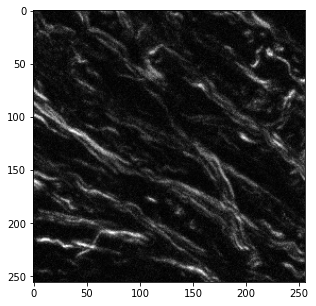

In [6]:
im_arr = img_as_uint(io.imread('examples/test_input.png'))
plt.figure(figsize=(5, 5))
plt.imshow(im_arr, cmap='gray')
plt.show()

### Adjust contrast (optional)

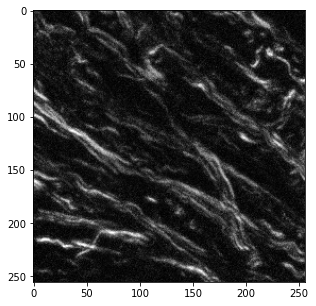

In [8]:
im_arr = img_as_uint(exposure.adjust_log(io.imread('examples/test_input.png'))) # adjust contrast if necessary
plt.figure(figsize=(5, 5))
plt.imshow(im_arr, cmap='gray')
plt.show()

### Extract collagen fiber centerline mask using network

Draw masks using skeletonization


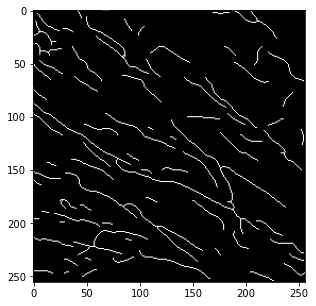

In [13]:
result = fiber_extractor.compute(im_arr, adjust_contrast=None) # you can pass a lambda function to `adjust_contrast` which will be applied to the input image
plt.figure(figsize=(5, 5))
plt.imshow(result, cmap='gray')
plt.show()

Draw masks using skeletonization


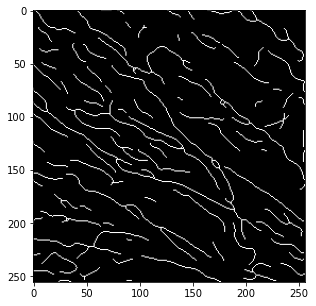

In [17]:
adj_gamma = lambda x: exposure.adjust_gamma(x, gamma=0.75)
med_filter = lambda x: filters.median(x, footprint=morphology.square(2))
gamma_med = lambda x: med_filter(adj_gamma(x))
result = fiber_extractor.compute(im_arr, adjust_contrast=gamma_med) # you can pass a lambda function to `adjust_contrast` which will be applied to the input image
plt.figure(figsize=(5, 5))
plt.imshow(result, cmap='gray')
plt.show()

### Load groundtruth mask

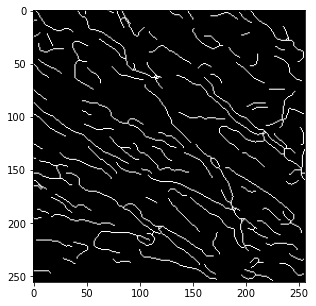

In [6]:
truth_mask = img_as_uint(io.imread('examples/test_groundtruth.png'))
plt.figure(figsize=(5, 5))
plt.imshow(truth_mask, cmap='gray')
plt.show()

### Extract collagen fiber centerlines for individual fiber instances

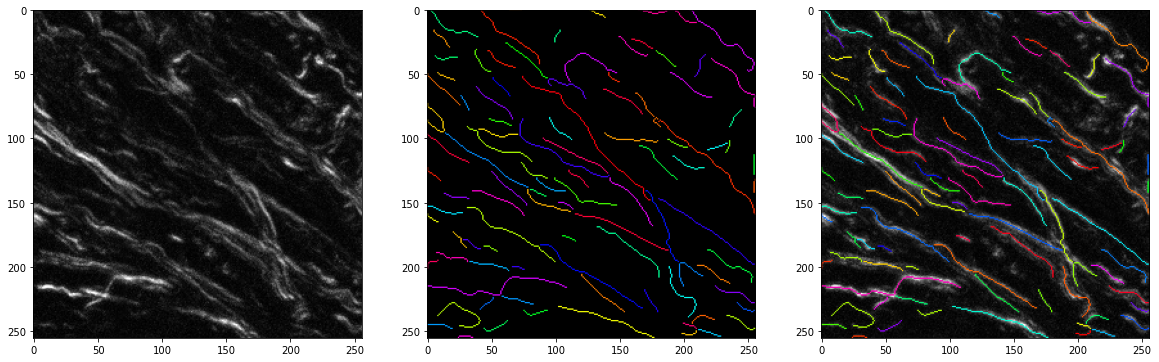

In [21]:
## instance masks
centerline_res = CenterLine(centerline_image=result, associate_image=io.imread('examples/test_input.png'), min_fiber_length=10)
# centerline_res = CenterLine(centerline_image=truth_mask, associate_image=io.imread('examples/test_input.png'))
centerline_res.create_overlay()